##**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##**Reading and Cleaning Data**

In [2]:
df = pd.read_csv('OCD Patient Dataset_ Demographics & Clinical Data.csv')

In [3]:
print('Dataset dimension: ', df.shape)

Dataset dimension:  (1500, 17)


In [4]:
print('Attributes in the dataset: ', df.columns)

Attributes in the dataset:  Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')


In [5]:
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


Attributes Description:
1. Patient ID - Unique identifier for each individual in the dataset.
2. Age - Age of the patient at the time of data collection.
3. Gender - Gender of the patient
4. Ethnicity - Ethnic background of the patient
5. Marital Status - Marital status of the patient
6. Education Level - Highest level of education completed by the patient.
7. OCD Diagnosis Date - Date when the patient was diagnosed with Obsessive-Compulsive Disorder.
8. Duration of Symptoms (months) - Number of months since the onset of OCD symptoms.
9. Previous Diagnoses - Any previous psychiatric diagnoses or comorbidities.
10. Family History of OCD - Indicates whether there is a family history of OCD in the patient's relatives.
11. Obsession Type - 'Harm-related', 'Contamination', 'Symmetry', 'Hoarding', 'Religious'
12. Compulsion Type - 'Checking', 'Washing', 'Ordering', 'Praying', 'Counting'
13. Y-BOCS Score (Obsessions) - Yale-Brown Obsessive Compulsive Scale for assessing the severity of OCD symptoms
14. Y-BOCS Score (Compulsions) - the other primary subscale of the Yale-Brown Obsessive Compulsive Scale (Y-BOCS). This part focuses on assessing the severity of compulsions.
15. Depression Diagnosis - Diagnosis of depression (Yes or No)
16. Anxiety Diagnosis - Diagnosis of anxiety (Yes or No)
17. Medications - Type of medications use

##**Checking Missing Values**

In [6]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,248
Family History of OCD,0


There are 248 missing values in Previous Diagnoses column and 386 missing values in	Medications column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

Among the 17 feature columns, 5 contain numerical values, while the remaining columns are categorical.

<Axes: >

<Figure size 640x480 with 0 Axes>

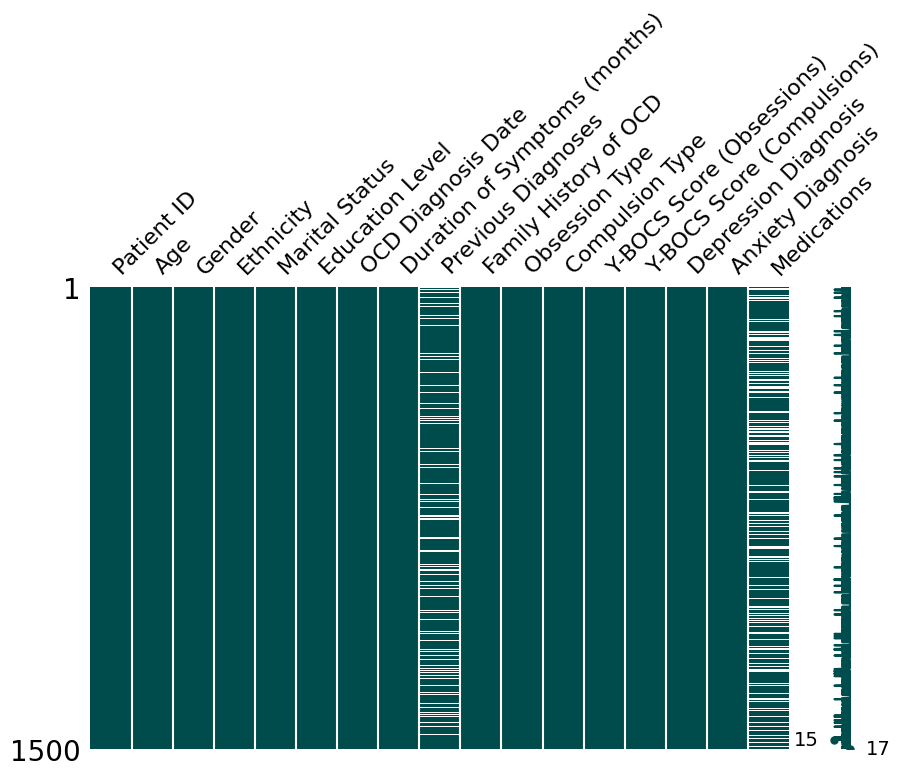

In [8]:
import missingno as msno
plt.gcf().set_facecolor('white')
msno.matrix(df, figsize=(10,6), color=(0,.3,.3))

##**Visualizing Demographic Data**


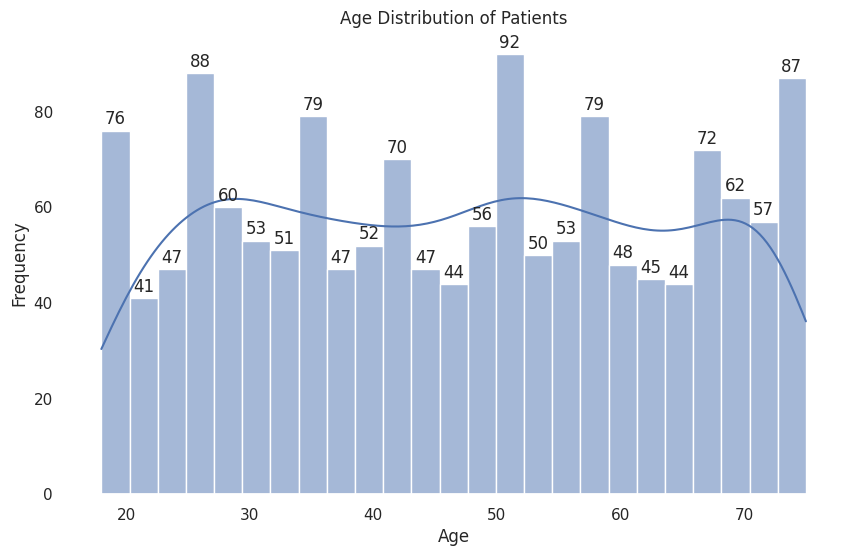

In [43]:
# Age distribution
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Age'], bins=25, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height) or height == 0:  # Skip empty bins
        continue
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,  # Adjust position as needed
            '{:1.0f}'.format(height), ha="center", va="bottom")
plt.show()

Number of Female Patients: 747
Number of Male Patients: 753


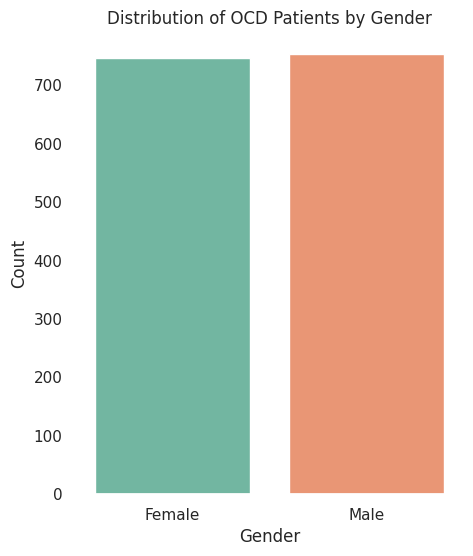

In [29]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Print the results
print("Number of Female Patients:", gender_counts.get('Female', 0))
print("Number of Male Patients:", gender_counts.get('Male', 0))

# Create a bar graph using seaborn
plt.figure(figsize=(5, 6))  # Adjust figure size as needed
sns.countplot(x='Gender', data=df, palette='Set2')  # Use countplot for easier visualization
plt.title('Distribution of OCD Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

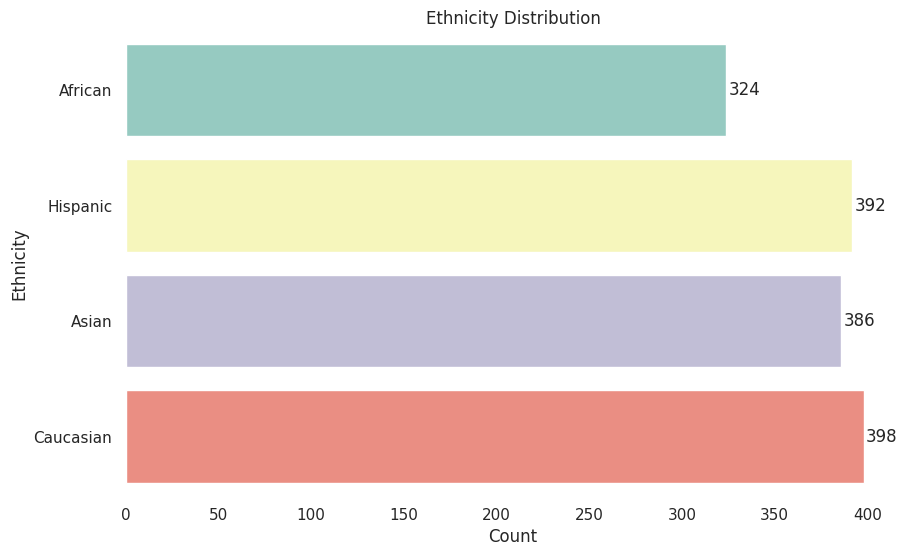

In [32]:

# Ethnicity distribution with values on bars
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Ethnicity', data=df, palette='Set3')
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')

# Add values on top of bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width), ha="left", va="center")

plt.show()

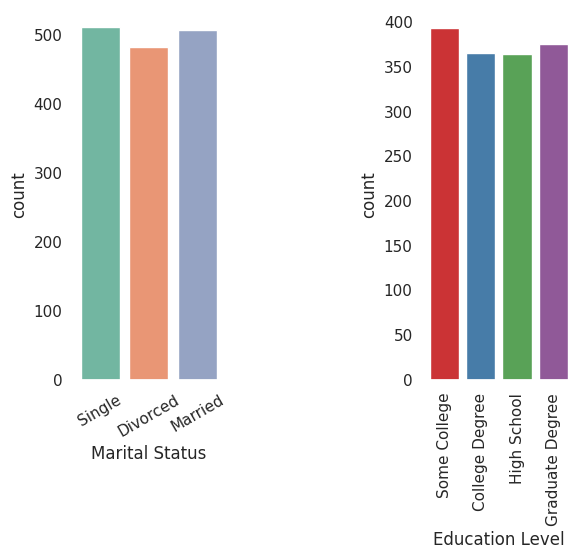

In [71]:
plt.subplot(1, 3, 1)
sns.countplot(x = df["Marital Status"], palette="Set2")
plt.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = df["Education Level"], palette="Set1")
plt.xticks(rotation = 90);

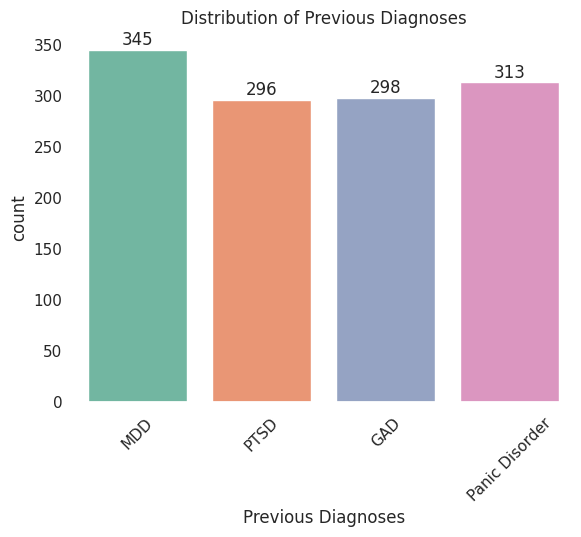

In [55]:

plt.plot(1, 3, 1)
ax = sns.countplot(x = df["Previous Diagnoses"], palette="Set2")
plt.title('Distribution of Previous Diagnoses')
# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height) or height == 0:  # Skip empty bins
        continue
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,  # Adjust position as needed
            '{:1.0f}'.format(height), ha="center", va="bottom")
plt.xticks(rotation = 45);

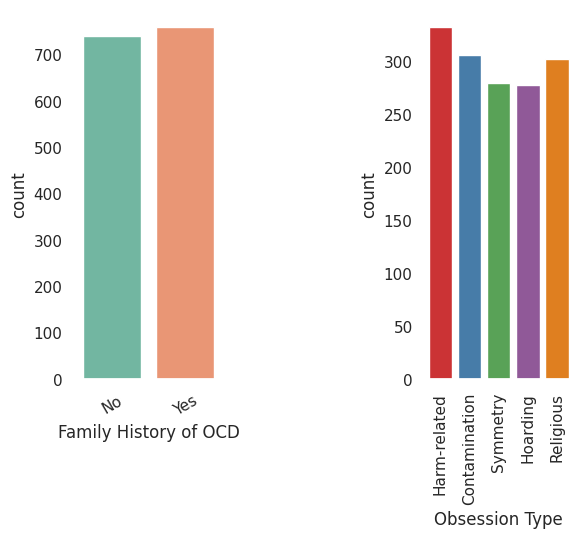

In [80]:
plt.subplot(1, 3, 1)
sns.countplot(x = df["Family History of OCD"], palette="Set2")
plt.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = df["Obsession Type"], palette="Set1")
plt.xticks(rotation = 90);

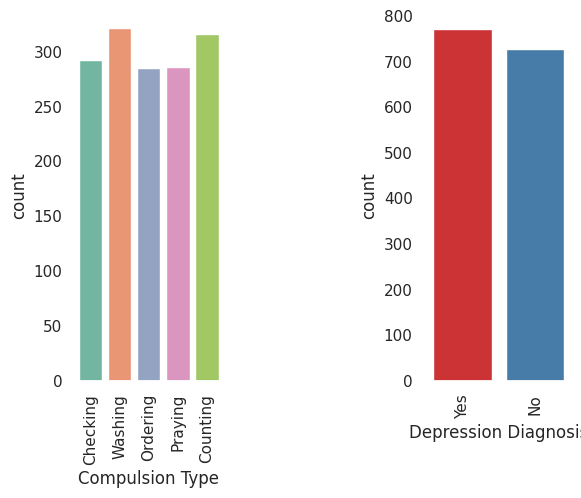

In [77]:
plt.subplot(1, 3, 1)
sns.countplot(x = df["Compulsion Type"], palette="Set2")
plt.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = df["Depression Diagnosis"], palette="Set1")
plt.xticks(rotation = 90);


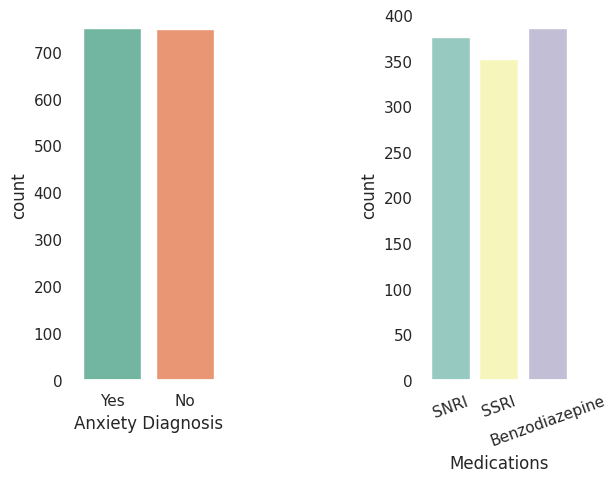

In [76]:
plt.subplot(1, 3, 1)
sns.countplot(x = df["Anxiety Diagnosis"], palette="Set2")
plt.xticks(rotation = 0);
plt.subplot(1, 3, 3)
sns.countplot(x = df["Medications"], palette="Set3")
plt.xticks(rotation = 20);

##**Clinical Data Analysis**

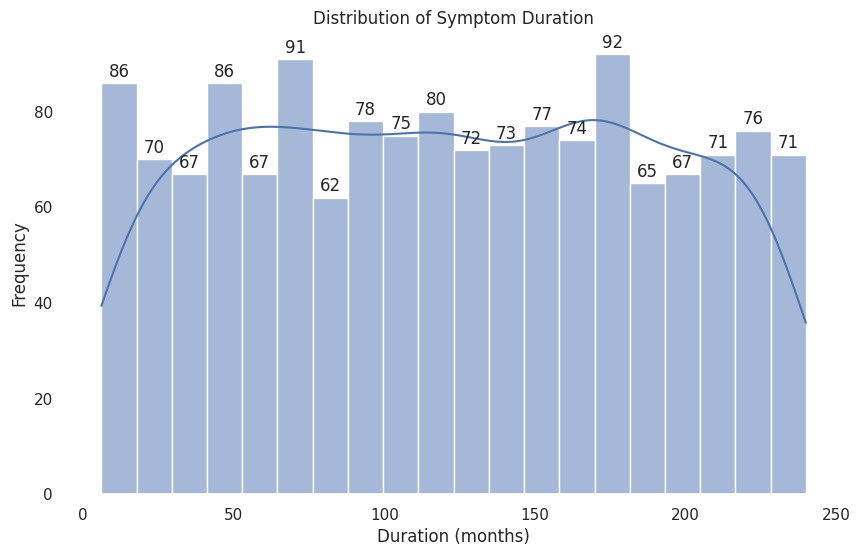

In [40]:

# Distribution of symptom duration with values on bars
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Duration of Symptoms (months)'], bins=20, kde=True)
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height) or height == 0:  # Skip empty bins
        continue
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,  # Adjust position as needed
            '{:1.0f}'.format(height), ha="center", va="bottom")

plt.show()

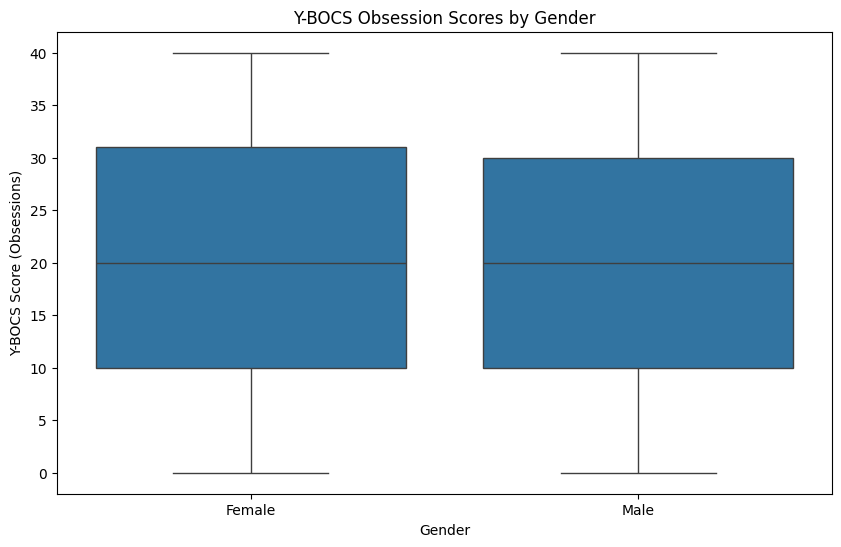

In [13]:
# Boxplot of Y-BOCS Scores by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df)
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')
plt.show()

##**Correlation Analysis**

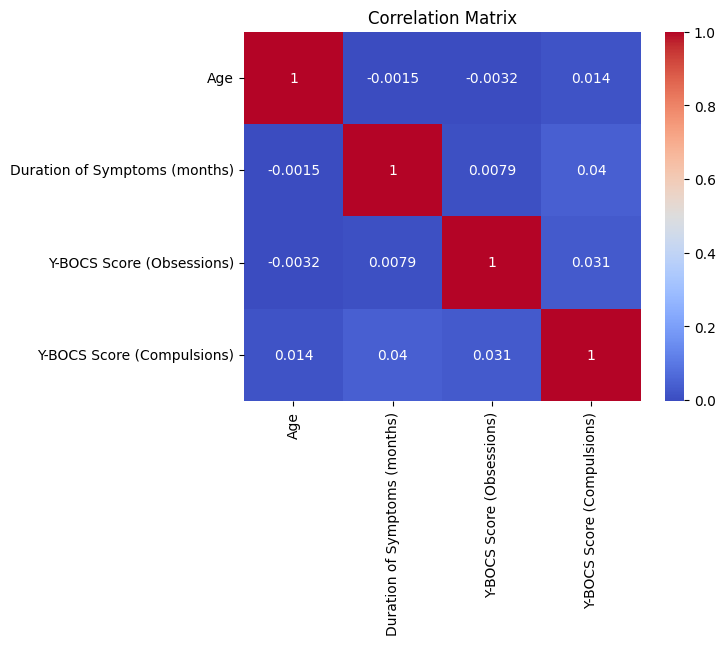

In [21]:
corr_matrix = df[['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

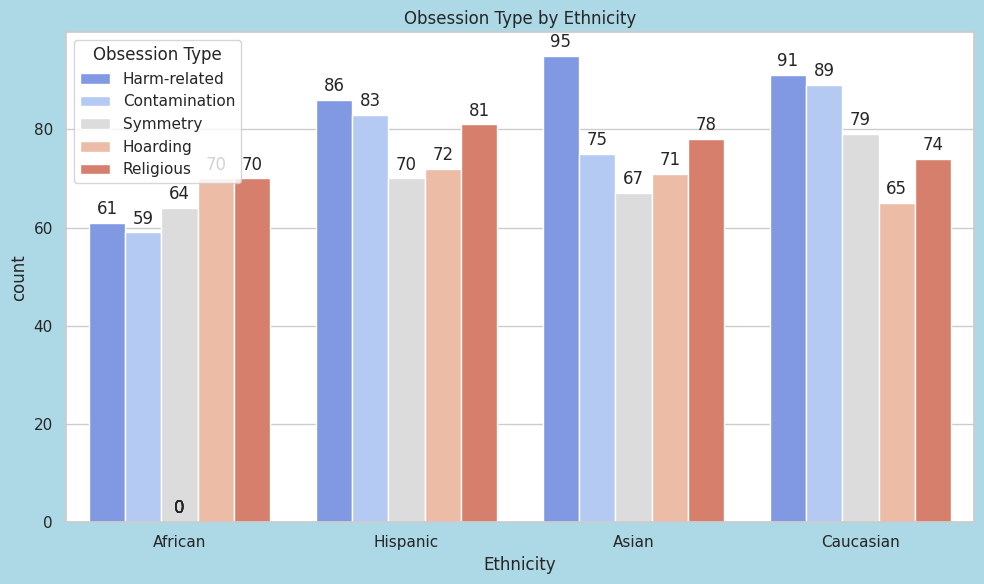

In [23]:
# Set the background color
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(data=df, x='Ethnicity', hue='Obsession Type', palette='coolwarm')
# Add a title
plt.title('Obsession Type by Ethnicity')
# Add data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

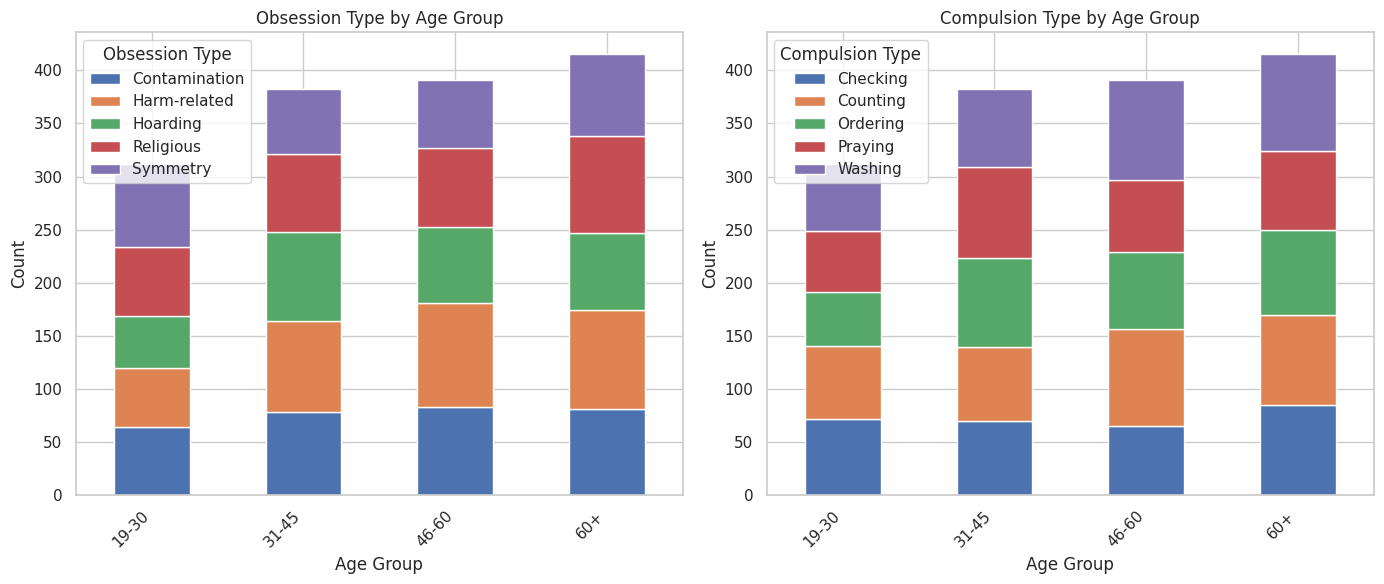

In [24]:
# Define age group bins and labels
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']

# Create a new column 'AgeGroup' using pd.cut
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a cross-tabulation table
obsession_counts = pd.crosstab(df['AgeGroup'], df['Obsession Type'])
compulsion_counts = pd.crosstab(df['AgeGroup'], df['Compulsion Type'])

# Create subplots for Obsession and Compulsion Types
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Set the background color for the entire figure
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# Plot for Obsession Type
obsession_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Obsession Type by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Plot for Compulsion Type
compulsion_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Compulsion Type by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

# Rotate x-axis labels and adjust layout
plt.setp(axes, xticks=axes[0].get_xticks(), xticklabels=axes[0].get_xticklabels())
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

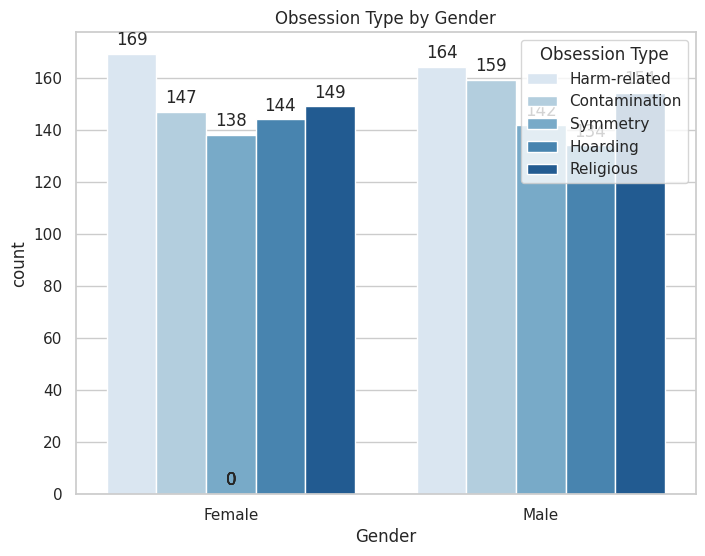

In [25]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the count plot with specified palette
plot = sns.countplot(data=df, x='Gender', hue='Obsession Type', palette='Blues')

# Set the background color
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
#Add a title by
plt.title('Obsession Type by Gender')
# Add data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

# Show the plot
plt.show()

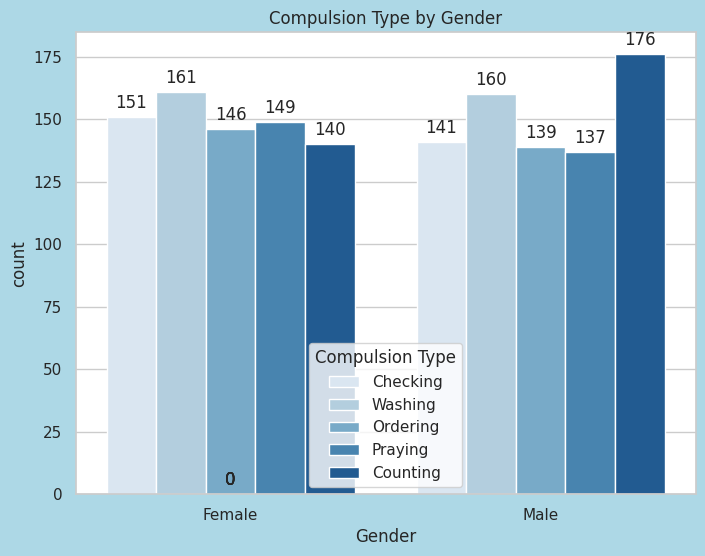

In [73]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the count plot with specified palette
plot = sns.countplot(data=df, x='Gender', hue='Compulsion Type', palette='Blues')

# Set the background color
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
#Add a title by
plt.title('Compulsion Type by Gender')
# Add data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

# Show the plot
plt.show()

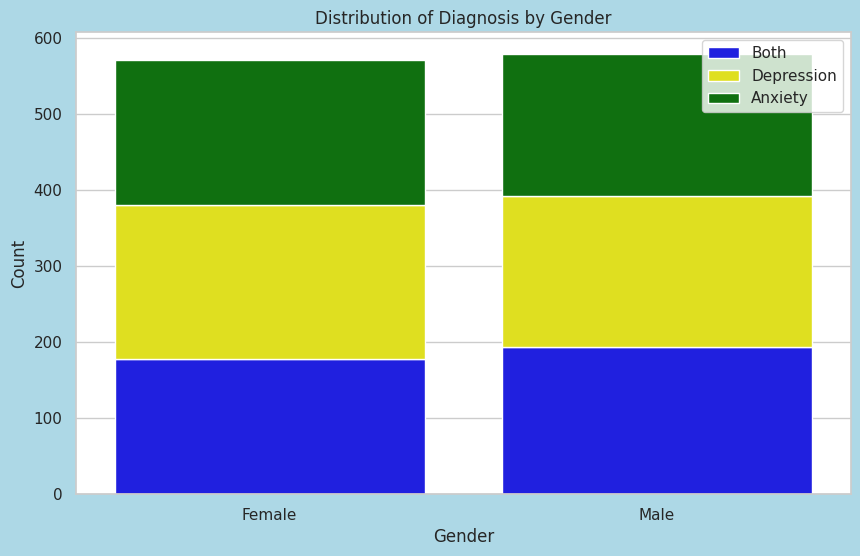

In [26]:

# Create the 'Diagnosis' column based on conditions
df['Diagnosis'] = 'None'  # Initialize with 'None'
df.loc[df['Depression Diagnosis'] == 'Yes', 'Diagnosis'] = 'Depression'
df.loc[df['Anxiety Diagnosis'] == 'Yes', 'Diagnosis'] = 'Anxiety'
df.loc[(df['Depression Diagnosis'] == 'Yes') & (df['Anxiety Diagnosis'] == 'Yes'), 'Diagnosis'] = 'Both'

# Create a cross-tabulation table
diagnosis_counts = pd.crosstab(df['Gender'], df['Diagnosis'])
diagnosis_by_gender = pd.crosstab(df['Gender'], df['Diagnosis'], rownames=['Gender'], colnames=['Diagnosis'])

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.set(style="whitegrid")
sns.barplot(x=diagnosis_by_gender.index, y=diagnosis_by_gender['Both'], color='blue', label='Both')
sns.barplot(x=diagnosis_by_gender.index, y=diagnosis_by_gender['Depression'], color='yellow', label='Depression',bottom=diagnosis_by_gender['Both'])
sns.barplot(x=diagnosis_by_gender.index, y=diagnosis_by_gender['Anxiety'], color='green', label='Anxiety',bottom=diagnosis_by_gender['Both']+diagnosis_by_gender['Depression'])

plt.title('Distribution of Diagnosis by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()  # Show legend
plt.show()

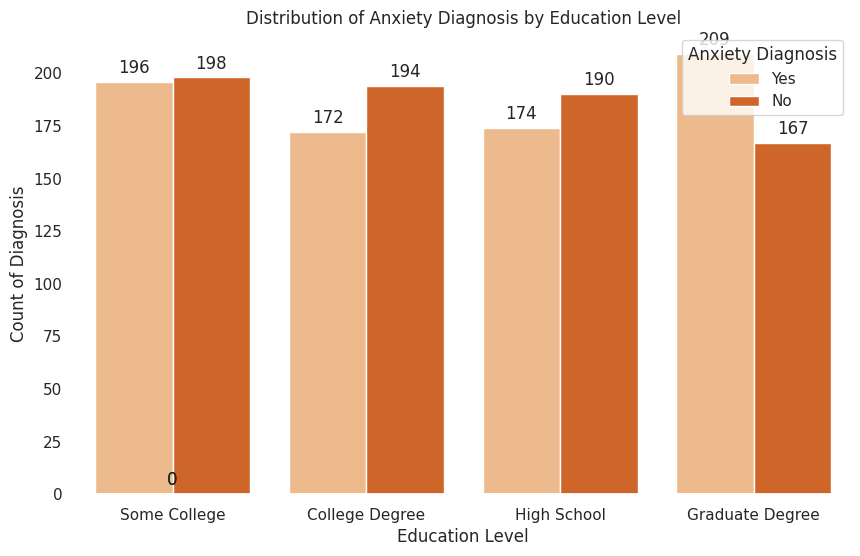

In [75]:
# Set the background color
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# Create the count plot for anxiety diagnosis by education level
plt.figure(figsize=(10, 6))

# **Check the actual column name in your DataFrame**
# **Replace 'Education Level' with the correct column name**
# Assuming the correct column name is 'Education'
plot = sns.countplot(data=df, x='Education Level',hue='Anxiety Diagnosis', palette='Oranges')

# Add a title
plt.title('Distribution of Anxiety Diagnosis by Education Level')

# Add axis titles
plt.xlabel('Education Level')
plt.ylabel('Count of Diagnosis')

# Add data labels
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')


# Display the plot
plt.show()